<Figure size 1200x1000 with 0 Axes>

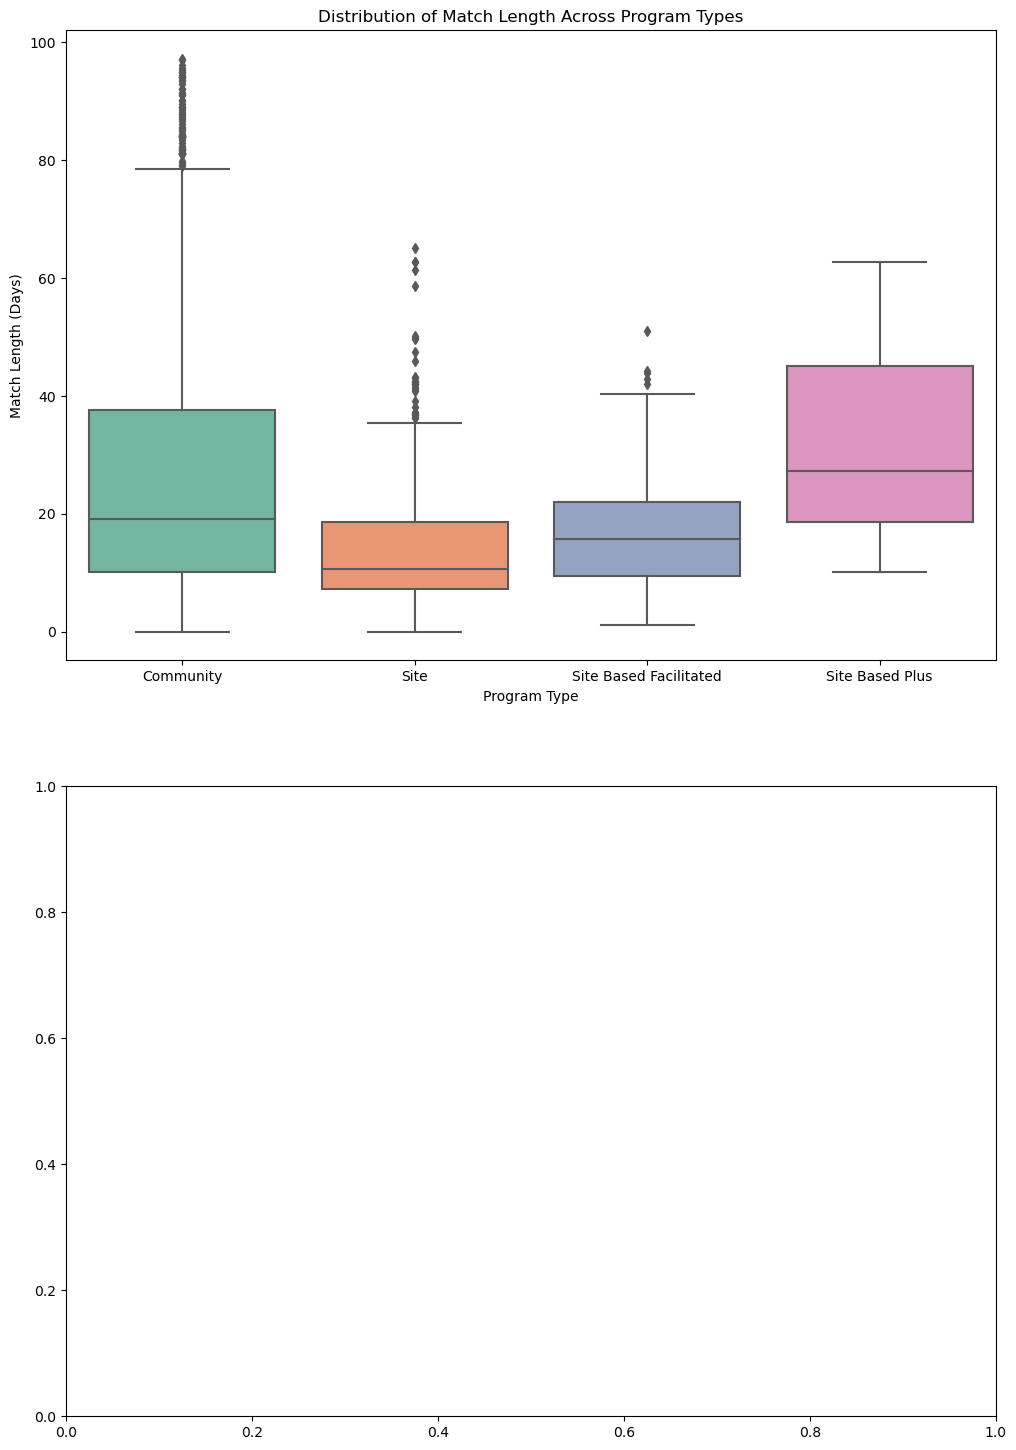

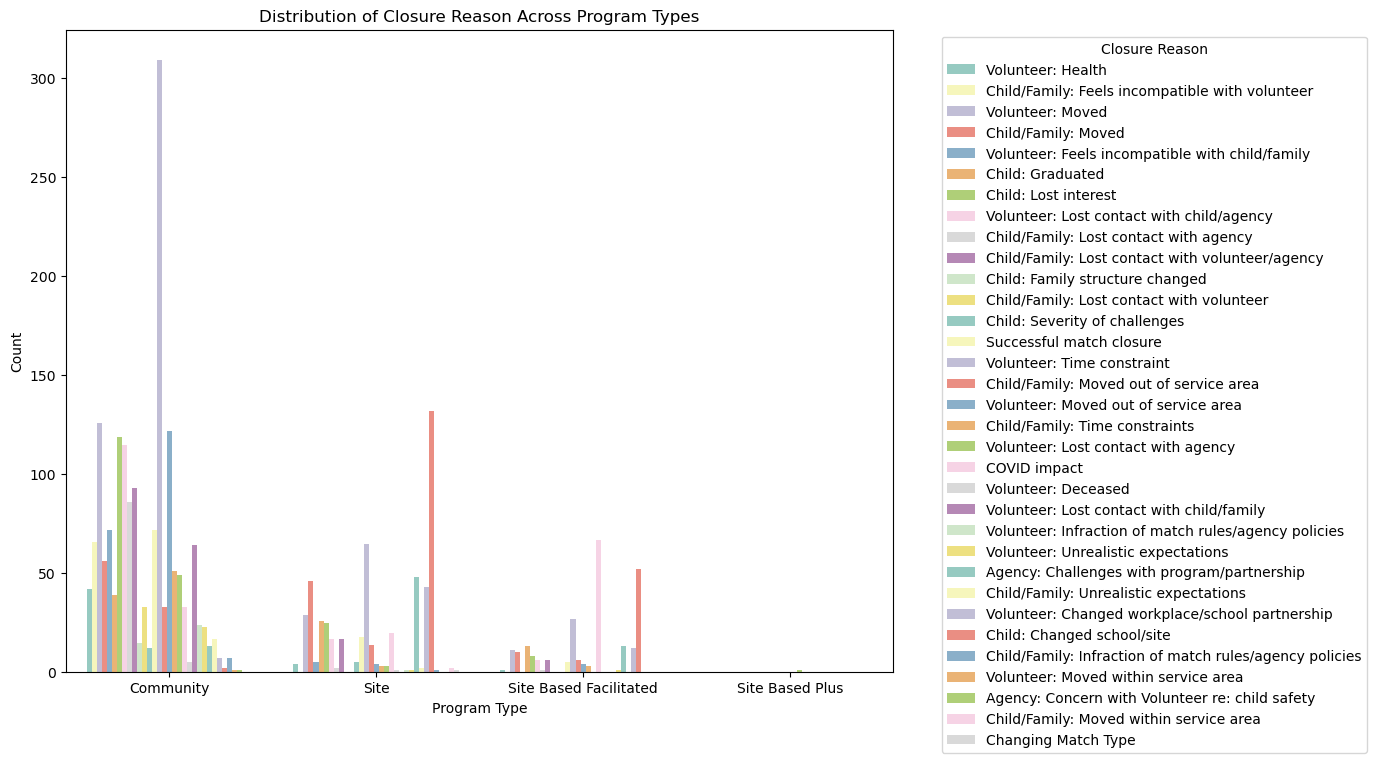

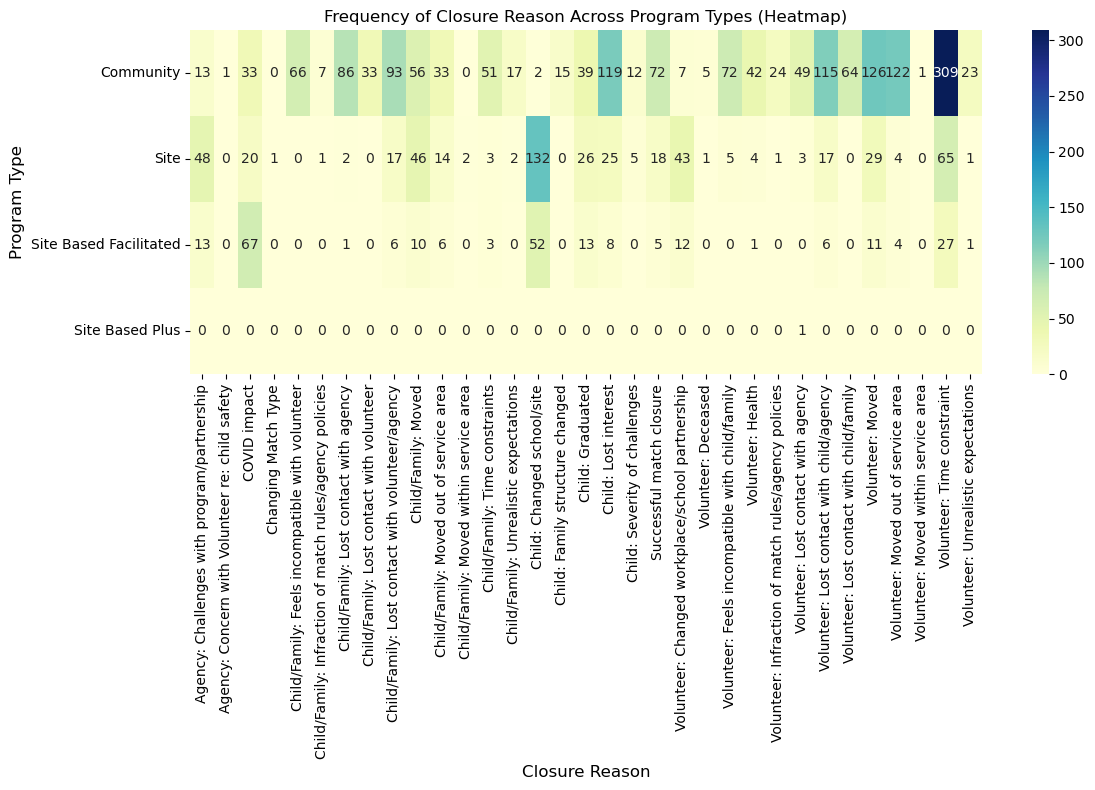

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('novice.csv')
plt.figure(figsize=(12, 10))

#Distribution of Match Length across Program Type
plt.figure(figsize=(12, 18))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
sns.boxplot(x='Program Type', y='Match Length', data=df, palette='Set2')
plt.title('Distribution of Match Length Across Program Types')
plt.xlabel('Program Type')
plt.ylabel('Match Length (Days)')

#Distribution of Closure Reason across Program Type
plt.subplot(2, 1, 2)
plt.figure(figsize=(14, 8))
sns.countplot(x='Program Type', hue='Closure Reason', data=df, palette='Set3')
plt.title('Distribution of Closure Reason Across Program Types')
plt.xlabel('Program Type')
plt.ylabel('Count')
plt.legend(title='Closure Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
cross_tab = pd.crosstab(df['Program Type'], df['Closure Reason'])

#Heatmap
plt.figure(figsize=(12,8 ))
sns.heatmap(cross_tab, annot=True, annot_kws={'size': 10}, fmt='d', cmap='YlGnBu')
plt.title('Frequency of Closure Reason Across Program Types (Heatmap)')
plt.xlabel('Closure Reason', fontsize=12)
plt.yticks(rotation=0) 
plt.ylabel('Program Type', fontsize=12)
plt.tight_layout()
plt.show()

Program Type: Community
  Mean Match Length: 26.30 days
  Median Match Length: 19.20 days
  Number of Matches: 2420
Program Type: Site
  Mean Match Length: 14.24 days
  Median Match Length: 10.60 days
  Number of Matches: 570
Program Type: Site Based Facilitated
  Mean Match Length: 16.71 days
  Median Match Length: 15.75 days
  Number of Matches: 282
Program Type: Site Based Plus
  Mean Match Length: 33.37 days
  Median Match Length: 27.20 days
  Number of Matches: 3


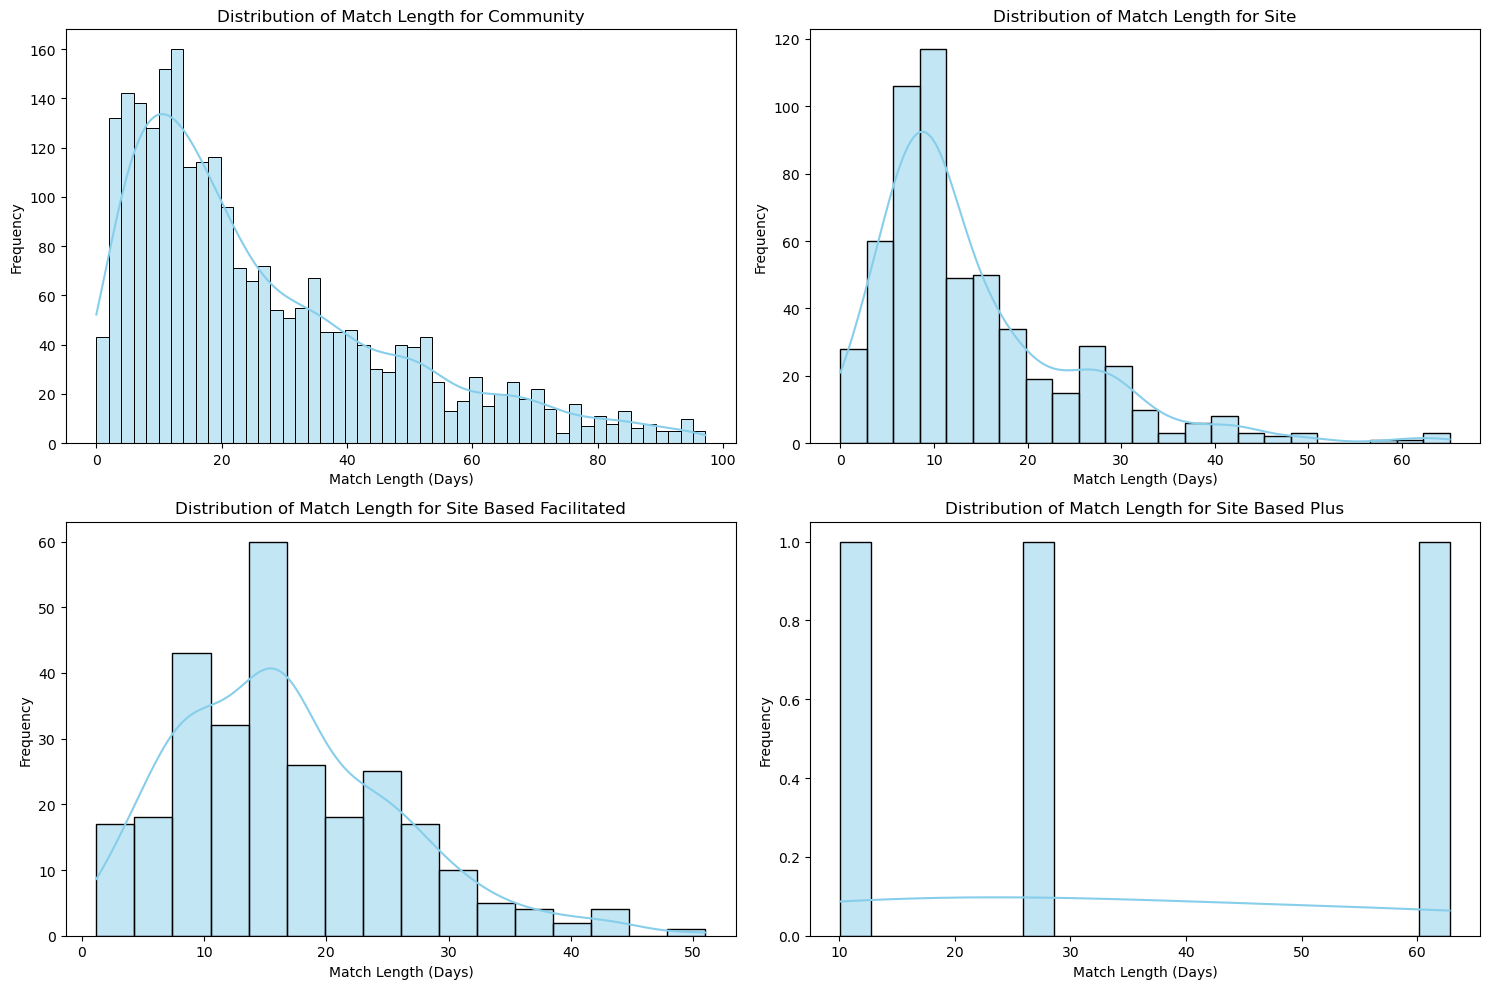

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('novice.csv')
program_types = df['Program Type'].unique()
plt.figure(figsize=(15, 10))
for i, program_type in enumerate(program_types, 1):
    program_data = df[df['Program Type'] == program_type]['Match Length']
    mean = program_data.mean()
    median = program_data.median()
    count = program_data.count()
    if count > 10:
        bin_count = int(np.sqrt(count))
    else:
        bin_count = 20
    plt.subplot(2, 2, i)
    sns.histplot(df[df['Program Type'] == program_type]['Match Length'], kde=True, color='skyblue', bins=bin_count)
    plt.title(f'Distribution of Match Length for {program_type}')
    plt.xlabel('Match Length (Days)')
    plt.ylabel('Frequency')
    print(f"Program Type: {program_type}")
    print(f"  Mean Match Length: {mean:.2f} days")
    print(f"  Median Match Length: {median:.2f} days")
    print(f"  Number of Matches: {count}")
plt.tight_layout()
plt.show()